# Spotify Songs Multiclass Genre Classification

Goal: This project aims to develop a model that classifies the Genre that can accurately predict the Genre of a music track on spotify

# Pre-requisites 

In [1]:
!pip install pandas    
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install tensorflow

# Load Libraries

In [9]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing 
from sklearn import metrics 
from sklearn.decomposition import PCA, KernelPCA, TruncatedSVD 
from sklearn.manifold import Isomap, TSNE, MDS 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis 

import random 

import numpy as np 
import tensorflow as tf 
from tensorflow import keras 

import os 

import warnings
warnings.simplefilter('ignore')

# data

In [49]:
genres_path = r'genres_v2.csv' 
playlists_path = r'playlists.csv'

data = pd.read_csv(genres_path)
data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,audio_features,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,audio_features,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,audio_features,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,audio_features,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,audio_features,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


In [50]:
data.iloc[:, :20]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name
0,0.831,0.814,2,-7.364,1,0.4200,0.059800,0.013400,0.0556,0.3890,156.985,audio_features,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde
1,0.719,0.493,8,-7.230,1,0.0794,0.401000,0.000000,0.1180,0.1240,115.080,audio_features,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology
2,0.850,0.893,5,-4.783,1,0.0623,0.013800,0.000004,0.3720,0.0391,218.050,audio_features,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote
3,0.476,0.781,0,-4.710,1,0.1030,0.023700,0.000000,0.1140,0.1750,186.948,audio_features,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote)
4,0.798,0.624,2,-7.668,1,0.2930,0.217000,0.000000,0.1660,0.5910,147.988,audio_features,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42300,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.3940,150.013,audio_features,46bXU7Sgj7104ZoXxzz9tM,spotify:track:46bXU7Sgj7104ZoXxzz9tM,https://api.spotify.com/v1/tracks/46bXU7Sgj710...,https://api.spotify.com/v1/audio-analysis/46bX...,269208,4,hardstyle,NaN
42301,0.517,0.768,0,-7.922,0,0.0479,0.022500,0.000018,0.2050,0.3830,149.928,audio_features,0he2ViGMUO3ajKTxLOfWVT,spotify:track:0he2ViGMUO3ajKTxLOfWVT,https://api.spotify.com/v1/tracks/0he2ViGMUO3a...,https://api.spotify.com/v1/audio-analysis/0he2...,210112,4,hardstyle,NaN
42302,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.1240,154.935,audio_features,72DAt9Lbpy9EUS29OzQLob,spotify:track:72DAt9Lbpy9EUS29OzQLob,https://api.spotify.com/v1/tracks/72DAt9Lbpy9E...,https://api.spotify.com/v1/audio-analysis/72DA...,234823,4,hardstyle,NaN
42303,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.029600,0.0575,0.4880,150.042,audio_features,6HXgExFVuE1c3cq9QjFCcU,spotify:track:6HXgExFVuE1c3cq9QjFCcU,https://api.spotify.com/v1/tracks/6HXgExFVuE1c...,https://api.spotify.com/v1/audio-analysis/6HXg...,323200,4,hardstyle,NaN


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

In [52]:
# number of unique values of each feature in the dataset
data.nunique()

danceability          890
energy                917
key                    12
loudness            11654
mode                    2
speechiness          1447
acousticness         4602
instrumentalness     4757
liveness             1695
valence              1674
tempo               15606
type                    1
id                  35877
uri                 35877
track_href          35877
analysis_url        35877
duration_ms         26261
time_signature          4
genre                  15
song_name           15439
Unnamed: 0          20780
title                 132
dtype: int64

# Data Cleaning

In [53]:
# to clean unnecessary data that add no value to the prediction 

df = data.drop([
    "type","type","id","uri","track_href","analysis_url","song_name",
                "Unnamed: 0","title", "duration_ms", "time_signature"
], axis=1)
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,0.831,0.814,2,-7.364,1,0.4200,0.059800,0.013400,0.0556,0.3890,156.985,Dark Trap
1,0.719,0.493,8,-7.230,1,0.0794,0.401000,0.000000,0.1180,0.1240,115.080,Dark Trap
2,0.850,0.893,5,-4.783,1,0.0623,0.013800,0.000004,0.3720,0.0391,218.050,Dark Trap
3,0.476,0.781,0,-4.710,1,0.1030,0.023700,0.000000,0.1140,0.1750,186.948,Dark Trap
4,0.798,0.624,2,-7.668,1,0.2930,0.217000,0.000000,0.1660,0.5910,147.988,Dark Trap
...,...,...,...,...,...,...,...,...,...,...,...,...
42300,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.3940,150.013,hardstyle
42301,0.517,0.768,0,-7.922,0,0.0479,0.022500,0.000018,0.2050,0.3830,149.928,hardstyle
42302,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.1240,154.935,hardstyle
42303,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.029600,0.0575,0.4880,150.042,hardstyle


In [54]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000
mean,0.639364,0.762516,5.370240,-6.465442,0.549462,0.136561,0.096160,0.283048,0.214079,0.357101,147.474056
std,0.156617,0.183823,3.666145,2.941165,0.497553,0.126168,0.170827,0.370791,0.175576,0.233200,23.844623
min,0.065100,0.000243,0.000000,-33.357000,0.000000,0.022700,0.000001,0.000000,0.010700,0.018700,57.967000
25%,0.524000,0.632000,1.000000,-8.161000,0.000000,0.049100,0.001730,0.000000,0.099600,0.161000,129.931000
50%,0.646000,0.803000,6.000000,-6.234000,1.000000,0.075500,0.016400,0.005940,0.135000,0.322000,144.973000
75%,0.766000,0.923000,9.000000,-4.513000,1.000000,0.193000,0.107000,0.722000,0.294000,0.522000,161.464000
max,0.988000,1.000000,11.000000,3.148000,1.000000,0.946000,0.988000,0.989000,0.988000,0.988000,220.290000


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  genre             42305 non-null  object 
dtypes: float64(9), int64(2), object(1)
memory usage: 3.9+ MB


In [56]:
df.nunique()

danceability          890
energy                917
key                    12
loudness            11654
mode                    2
speechiness          1447
acousticness         4602
instrumentalness     4757
liveness             1695
valence              1674
tempo               15606
genre                  15
dtype: int64

In [57]:
df['genre'].value_counts()

genre
Underground Rap    5875
Dark Trap          4578
Hiphop             3028
trance             2999
trap               2987
techhouse          2975
dnb                2966
psytrance          2961
techno             2956
hardstyle          2936
RnB                2099
Trap Metal         1956
Rap                1848
Emo                1680
Pop                 461
Name: count, dtype: int64

Text(0.5, 1.0, 'Genres')

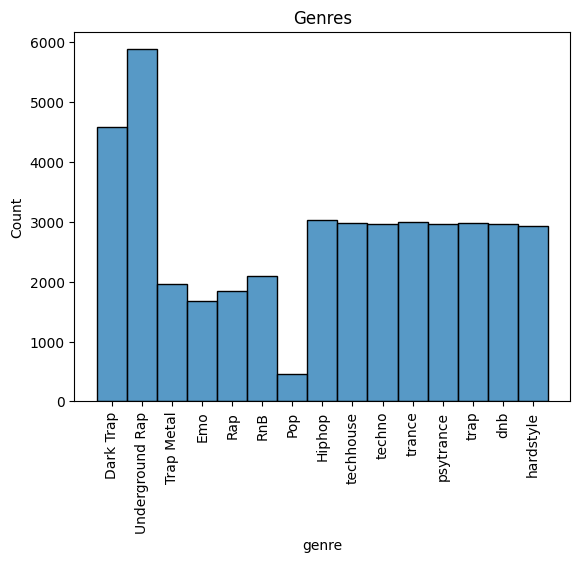

In [58]:
axe = sns.histplot(df['genre'])
plt.xticks(rotation=90)
plt.title('Genres')

In [59]:
# drop the rows with pop genres

df = df[
    ~(df['genre']== 'Pop')
].reset_index(drop=True)

df['genre'].value_counts()

genre
Underground Rap    5875
Dark Trap          4578
Hiphop             3028
trance             2999
trap               2987
techhouse          2975
dnb                2966
psytrance          2961
techno             2956
hardstyle          2936
RnB                2099
Trap Metal         1956
Rap                1848
Emo                1680
Name: count, dtype: int64

In [60]:
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,0.831,0.814,2,-7.364,1,0.4200,0.059800,0.013400,0.0556,0.3890,156.985,Dark Trap
1,0.719,0.493,8,-7.230,1,0.0794,0.401000,0.000000,0.1180,0.1240,115.080,Dark Trap
2,0.850,0.893,5,-4.783,1,0.0623,0.013800,0.000004,0.3720,0.0391,218.050,Dark Trap
3,0.476,0.781,0,-4.710,1,0.1030,0.023700,0.000000,0.1140,0.1750,186.948,Dark Trap
4,0.798,0.624,2,-7.668,1,0.2930,0.217000,0.000000,0.1660,0.5910,147.988,Dark Trap
...,...,...,...,...,...,...,...,...,...,...,...,...
41839,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.3940,150.013,hardstyle
41840,0.517,0.768,0,-7.922,0,0.0479,0.022500,0.000018,0.2050,0.3830,149.928,hardstyle
41841,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.1240,154.935,hardstyle
41842,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.029600,0.0575,0.4880,150.042,hardstyle


In [61]:
x = df.loc[:,:'tempo']
y = df['genre']

In [62]:
x.corr()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
danceability,1.000000,-0.324608,-0.013133,-0.218870,0.085789,0.184211,0.070473,-0.065724,-0.196866,0.369169,-0.167563
energy,-0.324608,1.000000,0.045013,0.603140,-0.031562,-0.150872,-0.495804,0.303650,0.231560,-0.013813,-0.023276
key,-0.013133,0.045013,1.000000,-0.006947,-0.250188,-0.031088,-0.004237,0.068760,0.003343,0.029533,-0.010681
loudness,-0.218870,0.603140,-0.006947,1.000000,-0.004879,0.050098,-0.284931,-0.186337,0.167971,0.076700,0.153185
mode,0.085789,-0.031562,-0.250188,-0.004879,1.000000,0.050455,-0.015634,-0.016375,0.008253,0.023070,-0.011819
speechiness,0.184211,-0.150872,-0.031088,0.050098,0.050455,1.000000,0.163345,-0.392013,0.056733,0.224940,0.166511
acousticness,0.070473,-0.495804,-0.004237,-0.284931,-0.015634,0.163345,1.000000,-0.262410,-0.106497,0.101200,0.054707
instrumentalness,-0.065724,0.303650,0.068760,-0.186337,-0.016375,-0.392013,-0.262410,1.000000,-0.017781,-0.252966,-0.208680
liveness,-0.196866,0.231560,0.003343,0.167971,0.008253,0.056733,-0.106497,-0.017781,1.000000,-0.023217,0.029513
valence,0.369169,-0.013813,0.029533,0.076700,0.023070,0.224940,0.101200,-0.252966,-0.023217,1.000000,0.058152


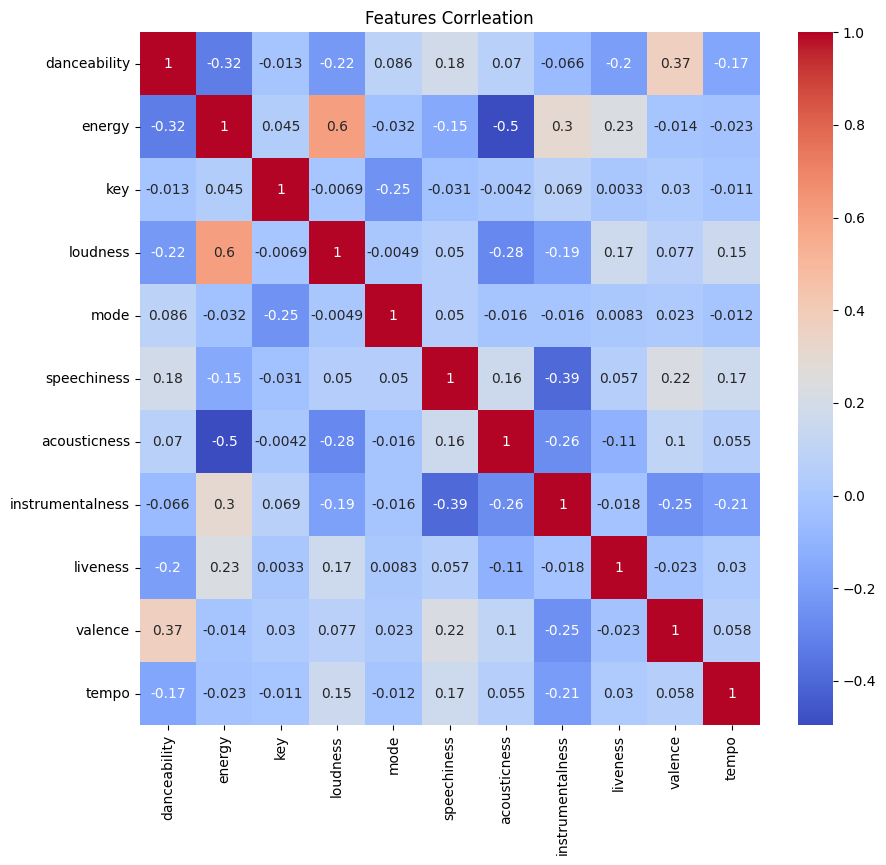

In [63]:
plt.subplots(figsize=(10,9))
sns.heatmap(x.corr(), cmap='coolwarm', annot=True)
plt.title('Features Corrleation')
plt.show()

In [64]:
y.unique()

array(['Dark Trap', 'Underground Rap', 'Trap Metal', 'Emo', 'Rap', 'RnB',
       'Hiphop', 'techhouse', 'techno', 'trance', 'psytrance', 'trap',
       'dnb', 'hardstyle'], dtype=object)

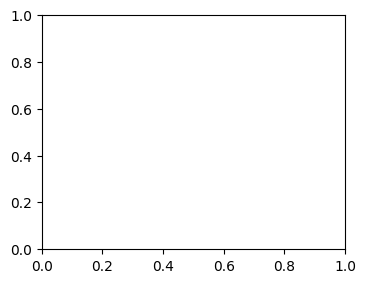

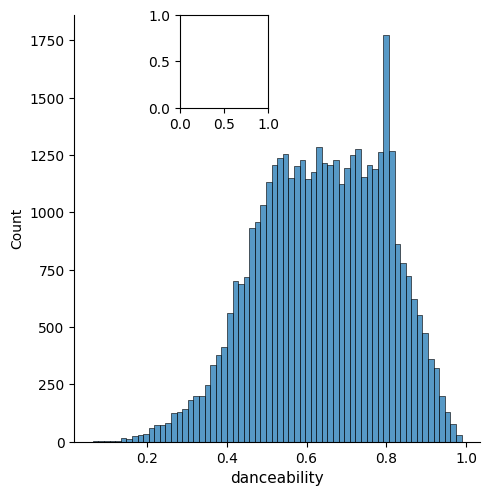

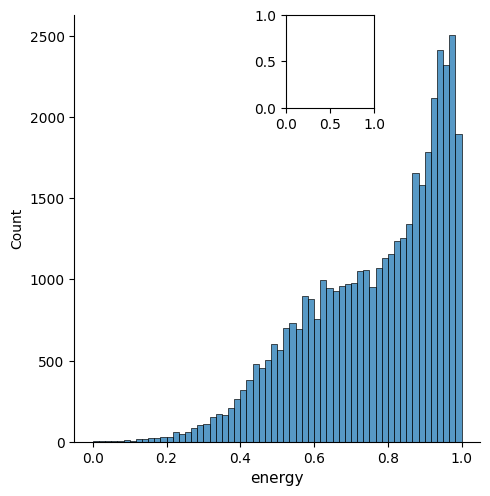

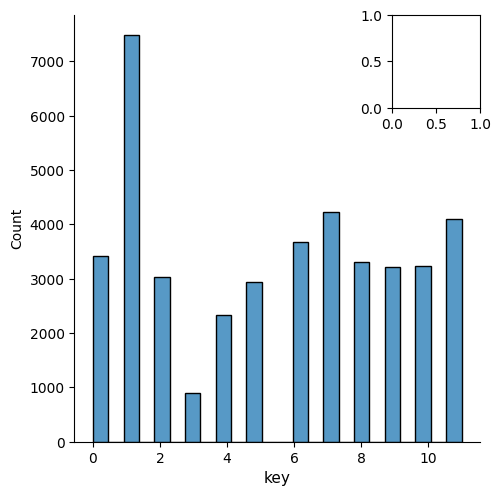

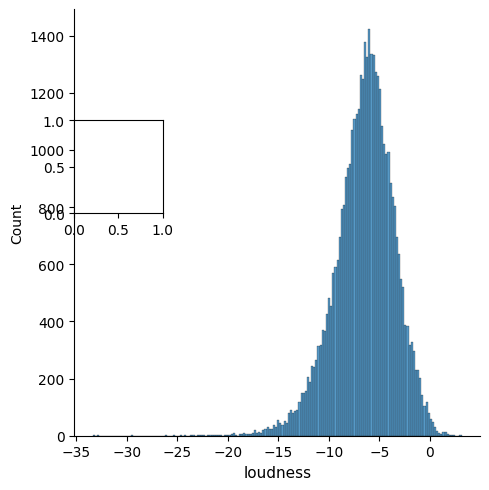

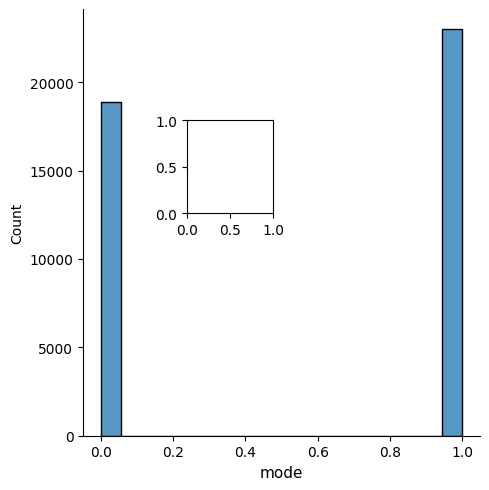

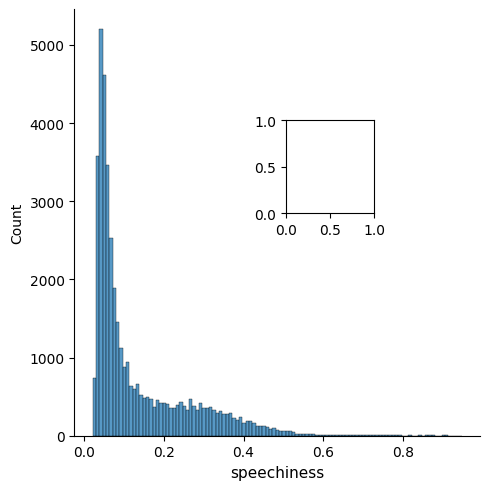

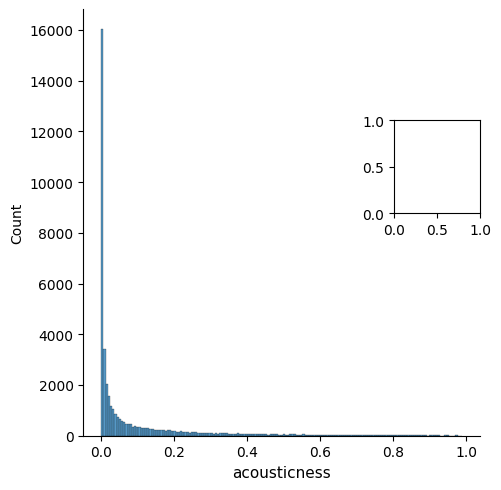

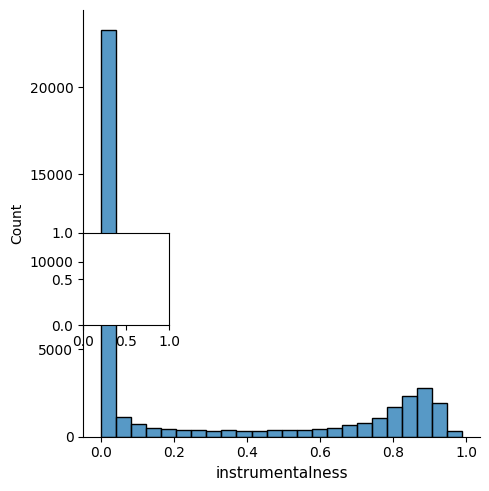

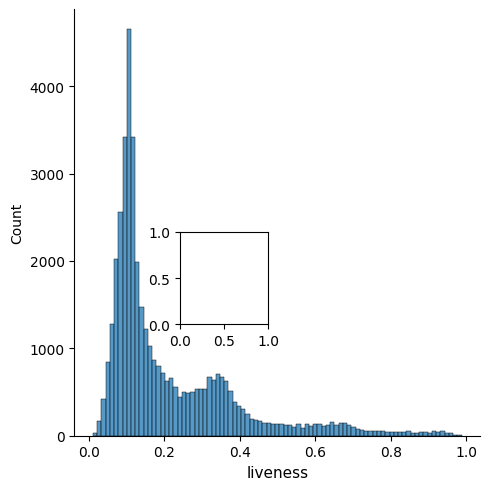

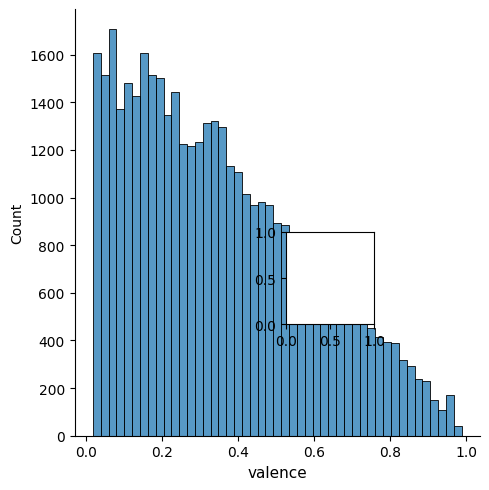

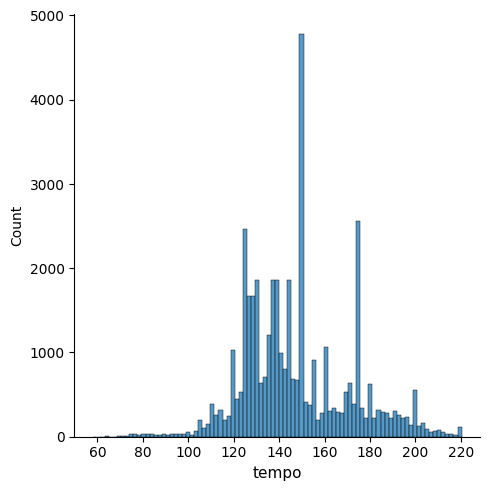

In [65]:
# Distribution plots for each column

k=0

plt.figure(figsize=(18,14))
for i in x.columns:
    plt.subplot(4,4,k+1)
    sns.displot(x[i])
    plt.xlabel(i, fontsize=11)
    k+=1
# plt.show()

# Model training

In [66]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=143, shuffle=True)
xtrain

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
21369,0.799,0.963,3,-5.090,1,0.0619,0.00534,0.049100,0.1010,0.8070,125.975
19620,0.680,0.687,7,-8.560,1,0.3240,0.10000,0.000000,0.2140,0.7860,190.228
11227,0.721,0.949,1,0.402,1,0.3100,0.18100,0.000000,0.6460,0.7050,155.015
31775,0.577,0.857,0,-6.808,1,0.0457,0.00137,0.177000,0.1140,0.6680,145.006
18786,0.908,0.669,7,-2.827,1,0.0738,0.00286,0.000000,0.2370,0.6620,112.238
...,...,...,...,...,...,...,...,...,...,...,...
13231,0.351,0.907,1,-4.265,1,0.0680,0.05470,0.000000,0.1050,0.2750,189.684
25121,0.622,0.545,9,-9.828,1,0.0447,0.01220,0.933000,0.1190,0.2110,127.006
17937,0.651,0.290,8,-11.972,0,0.2540,0.76100,0.000006,0.1020,0.1390,200.506
34969,0.633,0.996,1,-1.974,1,0.1890,0.00264,0.109000,0.9200,0.0701,150.003


In [67]:
xtrain.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,33475.000000,33475.000000,33475.000000,33475.000000,33475.000000,33475.000000,33475.000000,33475.000000,33475.000000,33475.000000,33475.000000
mean,0.638720,0.764305,5.361792,-6.461537,0.548827,0.136714,0.094461,0.286126,0.215113,0.355435,147.407197
std,0.156951,0.183607,3.666895,2.944799,0.497618,0.125921,0.169031,0.371737,0.176498,0.232704,23.623840
min,0.065100,0.000243,0.000000,-33.357000,0.000000,0.022700,0.000001,0.000000,0.012100,0.018700,57.967000
25%,0.523000,0.633000,1.000000,-8.151000,0.000000,0.049200,0.001650,0.000000,0.099600,0.160000,129.963000
50%,0.644000,0.806000,6.000000,-6.234000,1.000000,0.075900,0.015600,0.007100,0.135000,0.319000,144.973000
75%,0.767000,0.924000,9.000000,-4.501500,1.000000,0.194000,0.104000,0.729000,0.297000,0.519000,160.337500
max,0.988000,1.000000,11.000000,3.148000,1.000000,0.946000,0.988000,0.989000,0.988000,0.988000,220.290000


## feature scaling - Min max & Label Encoder

In [68]:
# using min max scaler

col = xtrain.columns 
scalerx = MinMaxScaler()
xtrain = scalerx.fit_transform(xtrain)
xtest = scalerx.transform(xtest)

xtrain

array([[0.79521075, 0.96299101, 0.27272727, ..., 0.0910954 , 0.81326731,
        0.41896712],
       [0.66626937, 0.68692392, 0.63636364, ..., 0.20688595, 0.79160219,
        0.81480135],
       [0.71069455, 0.9489876 , 0.09090909, ..., 0.64955426, 0.70803673,
        0.59786968],
       ...,
       [0.63484668, 0.28982743, 0.72727273, ..., 0.09212009, 0.12411018,
        0.87811955],
       [0.61534294, 0.99599903, 0.09090909, ..., 0.93032073, 0.05302796,
        0.56699297],
       [0.3975512 , 0.97099295, 1.        , ..., 0.06055948, 0.33560301,
        0.56625986]])

In [70]:
xtrain = pd.DataFrame(xtrain, columns=col)
xtest = pd.DataFrame(xtest,  columns=col)
xtrain

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.795211,0.962991,0.272727,0.774332,1.0,0.042456,0.005404,0.049646,0.091095,0.813267,0.418967
1,0.666269,0.686924,0.636364,0.679277,1.0,0.326329,0.101214,0.000000,0.206886,0.791602,0.814801
2,0.710695,0.948988,0.090909,0.924777,1.0,0.311166,0.183197,0.000000,0.649554,0.708037,0.597870
3,0.554665,0.856965,0.000000,0.727270,1.0,0.024911,0.001386,0.178969,0.104416,0.669865,0.536209
4,0.913317,0.668920,0.636364,0.836324,1.0,0.055345,0.002894,0.000000,0.230454,0.663675,0.334340
...,...,...,...,...,...,...,...,...,...,...,...
33470,0.309784,0.906977,0.090909,0.796932,1.0,0.049063,0.055363,0.000000,0.095194,0.264418,0.811450
33471,0.603424,0.544889,0.818182,0.644542,1.0,0.023828,0.012347,0.943377,0.109540,0.198391,0.425319
33472,0.634847,0.289827,0.727273,0.585810,0.0,0.250514,0.770243,0.000006,0.092120,0.124110,0.878120
33473,0.615343,0.995999,0.090909,0.859690,1.0,0.180115,0.002671,0.110212,0.930321,0.053028,0.566993


In [71]:
xtrain.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,33475.000000,33475.000000,33475.000000,33475.000000,33475.000000,33475.000000,33475.000000,33475.000000,33475.000000,33475.000000,33475.000000
mean,0.621541,0.764248,0.487436,0.736761,0.548827,0.123486,0.095607,0.289308,0.208027,0.347400,0.551001
std,0.170062,0.183652,0.333354,0.080668,0.497618,0.136382,0.171084,0.375871,0.180857,0.240075,0.145536
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.496153,0.632911,0.090909,0.690481,0.000000,0.028701,0.001669,0.000000,0.089661,0.145775,0.443535
50%,0.627262,0.805953,0.545455,0.742994,1.000000,0.057619,0.015788,0.007179,0.125935,0.309811,0.536005
75%,0.760537,0.923982,0.818182,0.790453,1.000000,0.185530,0.105262,0.737108,0.291936,0.516146,0.630659
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [72]:
xtest.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,8369.000000,8369.000000,8369.000000,8369.000000,8369.000000,8369.000000,8.369000e+03,8369.000000,8369.000000,8369.000000,8369.000000
mean,0.622796,0.758873,0.491131,0.734969,0.552037,0.125529,1.012471e-01,0.288741,0.204769,0.345015,0.551491
std,0.169964,0.185490,0.333143,0.081224,0.497314,0.139343,1.778874e-01,0.375377,0.177676,0.239007,0.148764
min,0.026005,0.029464,0.000000,0.106259,0.000000,0.001191,1.417006e-07,0.000000,-0.001435,0.000000,0.043019
25%,0.498321,0.625909,0.090909,0.687276,0.000000,0.028918,1.901753e-03,0.000000,0.089558,0.143712,0.437806
50%,0.630513,0.798951,0.545455,0.741214,1.000000,0.056753,1.781270e-02,0.006299,0.124910,0.309811,0.536030
75%,0.758370,0.920981,0.818182,0.787782,1.000000,0.188779,1.133594e-01,0.730030,0.283738,0.515114,0.640987
max,1.000000,0.999000,1.000000,0.982222,1.000000,0.965342,9.969636e-01,0.991911,0.992827,0.991747,0.999064


In [ ]:
## target variable encoding using LABEL encoder

le = preprocessing.LabelEncoder()
ytrain = le.fit_transform(ytrain)
ytest = le.transform(ytest)

x = 